In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 12]

# Load and clear data

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Check if there are null values (e.g. NaN)
df.isnull().values.any()

False

# Exploratory data analysis

Perform Exploratory data analysis (EDA) in order to understand the structure of the data. Numerical EDA gives you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Visual EDA on the other hand will give you insight into features and target relationship and distribution.

## Numerical EDA

In [5]:
# Check how big is dataset, how many and of what type features it has, what is target etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


Variables description:
```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visual EDA

### Crime level in relation to citizen status and median value of houses

In [7]:
df['medv_bins'] = pd.cut(df.medv, bins=5, include_lowest=True)
df.medv_bins.head()

0    (23.0, 32.0]
1    (14.0, 23.0]
2    (32.0, 41.0]
3    (32.0, 41.0]
4    (32.0, 41.0]
Name: medv_bins, dtype: category
Categories (5, interval[float64]): [(4.954, 14.0] < (14.0, 23.0] < (23.0, 32.0] < (32.0, 41.0] < (41.0, 50.0]]

In [8]:
df['lstat_bins'] = pd.cut(df.lstat, bins=[0, 7, 17, 38], labels=['richest', 'ordinary', 'poorest'], include_lowest=True)
df.lstat_bins.head()

0     richest
1    ordinary
2     richest
3     richest
4     richest
Name: lstat_bins, dtype: category
Categories (3, object): [richest < ordinary < poorest]

[Text(0.5,0,'')]

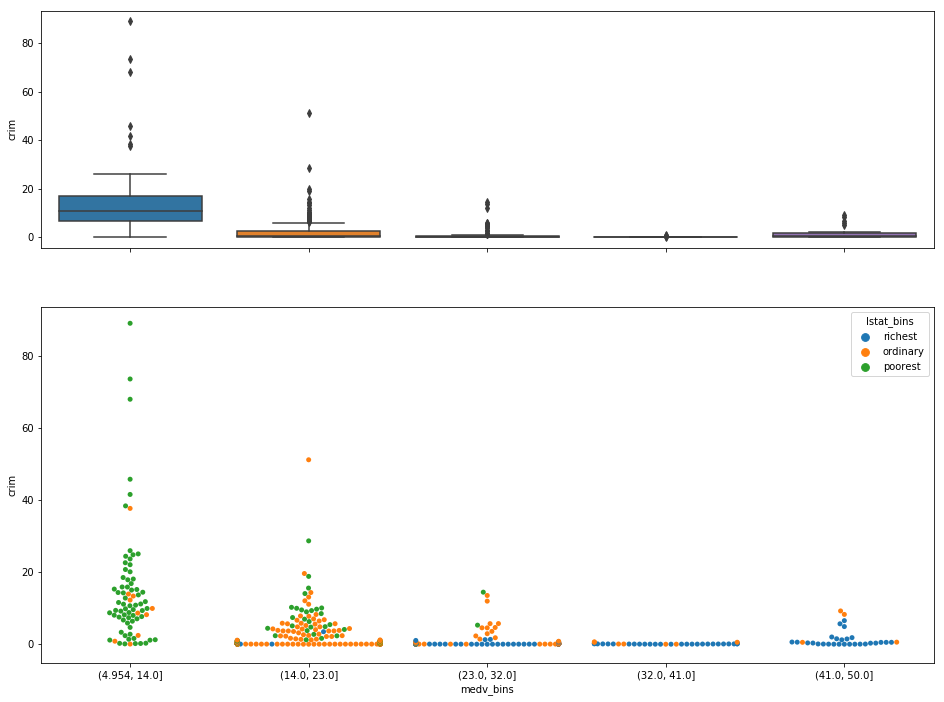

In [14]:
f, (ax_viol, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.4, .6)})

sns.boxplot(x='medv_bins', y='crim', data=df, ax=ax_viol)
sns.swarmplot(x='medv_bins', y='crim', hue='lstat_bins', data=df, ax=ax_box)

ax_viol.set(xlabel='')

[Text(0.5,0,'')]

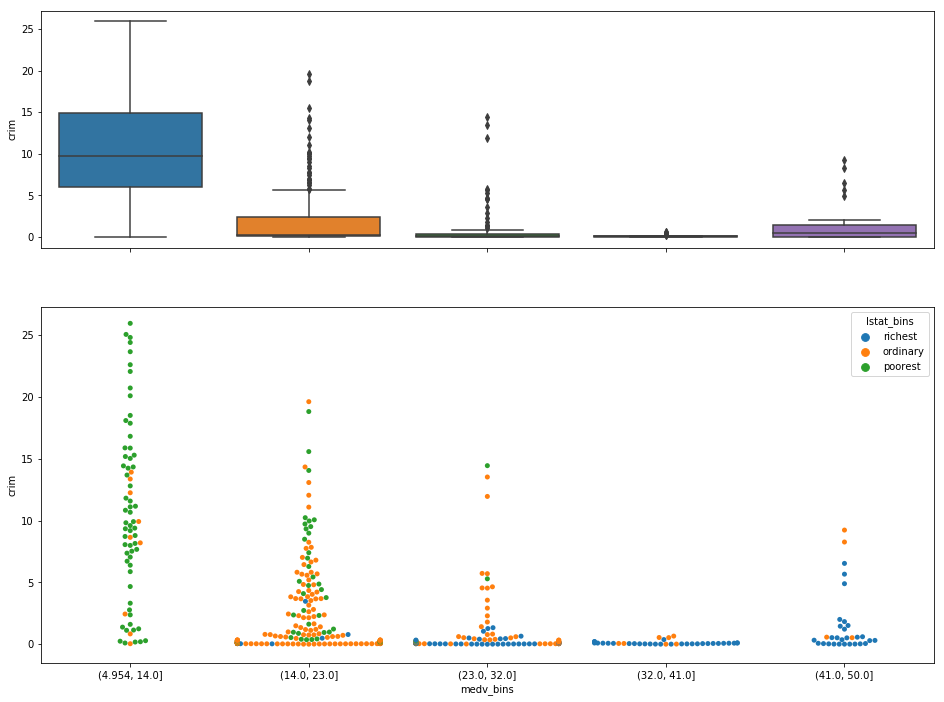

In [15]:
f, (ax_viol, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.4, .6)})

sns.boxplot(x='medv_bins', y='crim', data=df[df.crim < 27], ax=ax_viol)
sns.swarmplot(x='medv_bins', y='crim', hue='lstat_bins', data=df[df.crim < 27], ax=ax_box)

ax_viol.set(xlabel='')

### Find feature with strongest correlation to median house values

In [11]:
corr = df.corr()['medv'].abs().sort_values(ascending=False)
corr[1:6]

lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
Name: medv, dtype: float64

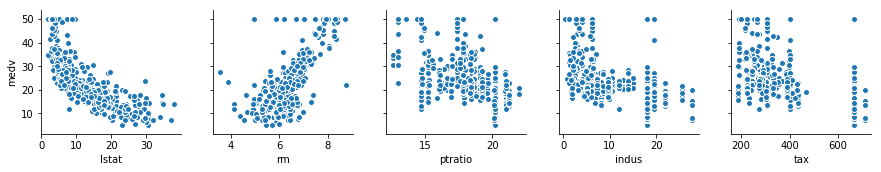

In [12]:
sns.pairplot(data=df, x_vars=corr.index[1:6], y_vars='medv')

LSTAT (% lower status of the population) has highest correlation with MEDV (Median value of owner-occupied homes in $1000's, our target), but as we can see relationship isn't linear. On the other hand RM (average number of rooms per dwelling) begs to fit a line to it!